In [5]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdf
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [14]:
## 주식 데이터 불러오기
df = fdr.DataReader('AAPL', '2020-01-02', '2023-09-08')
print(df)

adj_close_df = df[['Adj Close','Volume']]
print(adj_close_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   73.249023   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.536896   
2020-01-06   73.447502   74.989998   73.187500   74.949997   73.114883   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.771034   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.941643   
...                ...         ...         ...         ...         ...   
2023-08-31  187.839996  189.119995  187.479996  187.869995  187.869995   
2023-09-01  189.490005  189.919998  188.279999  189.460007  189.460007   
2023-09-05  188.279999  189.979996  187.610001  189.699997  189.699997   
2023-09-06  188.399994  188.850006  181.470001  182.910004  182.910004   
2023-09-07  175.179993  178.210007  173.539993  177.559998  177.559998   

               Volume  
Date         

,USD_KRX_close
Date,
2018-08-30,1108.449951
2018-08-31,1115.449951
2018-09-03,1114.810059
2018-09-04,1113.500000
2018-09-05,1121.300049
...,...
2023-09-12,1320.439941
2023-09-13,1324.099976
2023-09-14,1329.770020


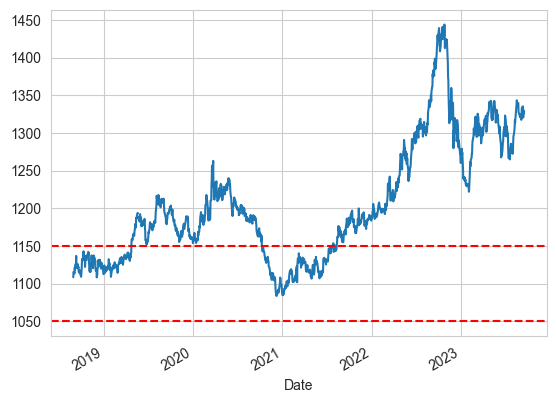

In [7]:
start = '2018-08-30'

## 미국 원달러 환율
USD_KRX = fdr.DataReader('USD/KRW', start) # 미국 달러/ 한국 원(원달러)
graph = USD_KRX.loc [:,'Close'].plot()
graph.axhline(1050, ls='--', color='r') #1050선
graph.axhline(1150, ls='--', color='r') # 1150선

USD_KRX = USD_KRX[['Close']].rename(columns={"Close": "USD_KRX_close"})
USD_KRX


In [8]:
from fredapi import Fred
fred = Fred(api_key = '4c55d0ee6170369793707da4cba1b7be')


            5-year  10-year  20-year
Date                                
2018-08-30    2.75     2.86     2.93
2018-08-31    2.74     2.86     2.95
2018-09-03     NaN      NaN      NaN
2018-09-04    2.78     2.90     2.99
2018-09-05    2.77     2.90     3.00
...            ...      ...      ...
2023-09-08    4.39     4.26     4.52
2023-09-11    4.40     4.29     4.56
2023-09-12    4.41     4.27     4.54
2023-09-13    4.39     4.25     4.52
2023-09-14    4.42     4.29     4.57

[1316 rows x 3 columns]


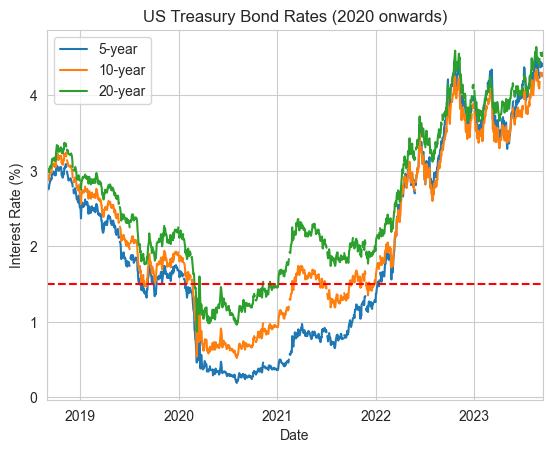

In [9]:
## 미국 국채 금리 (20년, 10년, 5년, 1년)
dgs5 = fred.get_series('DGS5', observation_start=start)
dgs10 = fred.get_series('DGS10', observation_start=start)
dgs20 = fred.get_series('DGS20', observation_start=start)

DGS = pd.concat([dgs5, dgs10, dgs20], axis=1)
DGS.columns = ['5-year', '10-year', '20-year']
DGS.index.name = 'Date'
print(DGS)
graph = DGS.plot(title="US Treasury Bond Rates (2020 onwards)")
graph.set_ylabel("Interest Rate (%)")
graph.axhline(1.5, ls='--', color='r')


            T10Y2Y
Date              
2018-08-30    0.22
2018-08-31    0.24
2018-09-03    0.24
2018-09-04    0.24
2018-09-05    0.24
...            ...
2023-09-11   -0.68
2023-09-12   -0.71
2023-09-13   -0.71
2023-09-14   -0.71
2023-09-15   -0.69

[1317 rows x 1 columns]


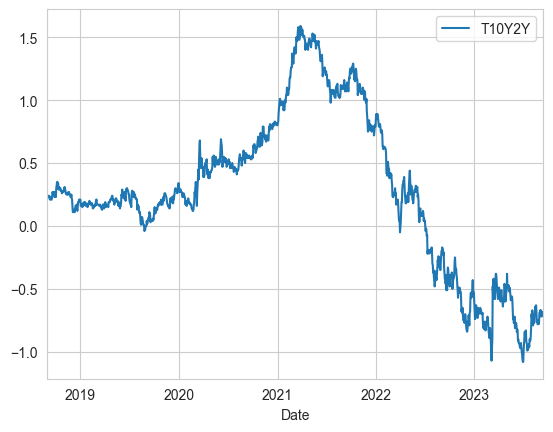

In [138]:
# 미국 장단기 금리차 | 금리차가 0에 가까워지거나 음수가 되면 (인버전), 이는 종종 경제의 둔화 또는 경기침체를 앞두고 있다는 시장의 예상을 반영하는 것
T10Y2Y = fdr.DataReader('FRED:T10Y2Y', start)
T10Y2Y.index.name = 'Date'
print(T10Y2Y)
graph=T10Y2Y.plot()

            VIXCLS
Date              
2018-08-30   13.53
2018-08-31   12.86
2018-09-03   12.86
2018-09-04   13.16
2018-09-05   13.91
...            ...
2023-09-08   13.84
2023-09-11   13.80
2023-09-12   14.23
2023-09-13   13.48
2023-09-14   12.82

[1316 rows x 1 columns]


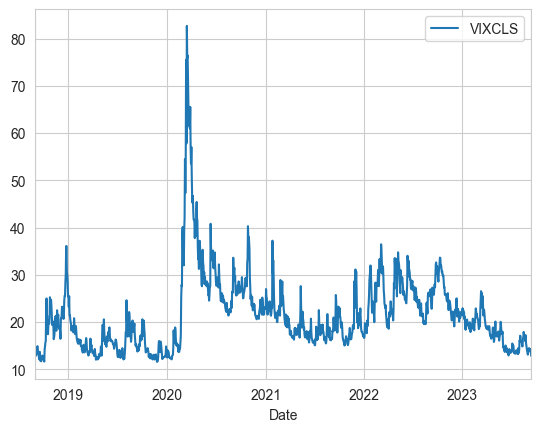

In [139]:
## VIX(변동 지수 %) 시장 불안정성: VIX 지수가 20을 초과하면 일반적으로 시장의 불안정성이 높다고 간주된다. | S&P 500 지수의 연간 변동성을 나타낸다 
VIX = fdr.DataReader('FRED:VIXCLS', start)
VIX.index.name = 'Date'
print(VIX)
graph = VIX.plot()

            FEDFUNDS
Date                
2018-08-01      1.91
2018-09-01      1.95
2018-10-01      2.19
2018-11-01      2.20
2018-12-01      2.27
...              ...
2023-04-01      4.83
2023-05-01      5.06
2023-06-01      5.08
2023-07-01      5.12
2023-08-01      5.33

[61 rows x 1 columns]


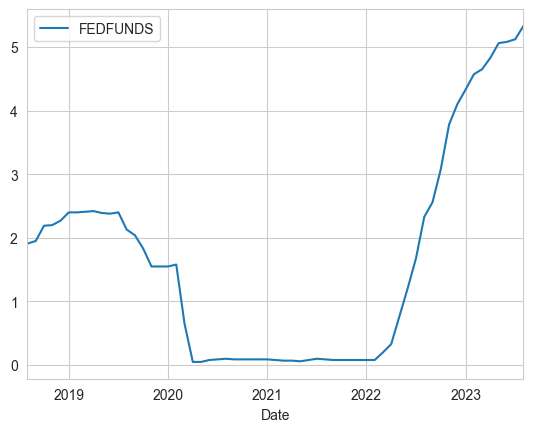

In [10]:
# 중앙은행의 기준금리 지표

FEDFUNDS = fdr.DataReader('FRED:FEDFUNDS', start)
FEDFUNDS.index.name = 'Date'

print(FEDFUNDS)
graph = FEDFUNDS.plot()

            STLFSI3
Date               
2018-08-31  -0.9018
2018-09-07  -0.8120
2018-09-14  -0.9339
2018-09-21  -1.0701
2018-09-28  -0.9743
...             ...
2022-09-30  -1.1795
2022-10-07  -1.1460
2022-10-14  -1.3854
2022-10-21  -1.8553
2022-10-28  -1.7057

[218 rows x 1 columns]


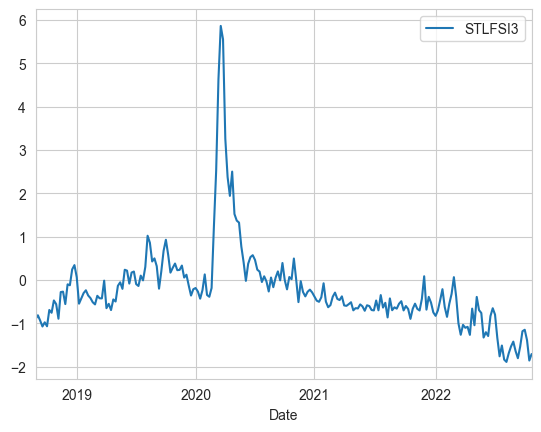

In [140]:
## 금융 스트레스 지수 (FSI) - 0을 기준으로 0보다 크면 금융 스트레스 수준이 평균보다 높고 작으면 평균보다 작다는것
STLFSI3 = fdr.DataReader('FRED:STLFSI3', start)
STLFSI3.index.name = 'Date'

print(STLFSI3)
graph = STLFSI3.plot()

            CPIAUCSL
Date                
2018-08-01   251.663
2018-09-01   252.182
2018-10-01   252.772
2018-11-01   252.594
2018-12-01   252.767
...              ...
2023-04-01   302.918
2023-05-01   303.294
2023-06-01   303.841
2023-07-01   304.348
2023-08-01   306.269

[61 rows x 1 columns]


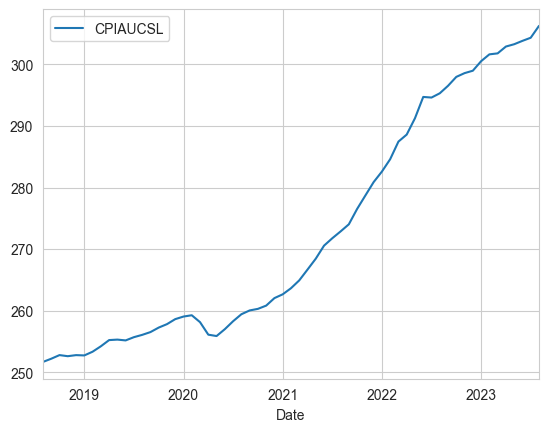

In [141]:
## 소비자 가격 지수 → 인플레이션(CPI) Index 값 기준: 1982-1984로, 이 기간의 평균 CPI를 100으로 설정합니다
CPI = fdr.DataReader('FRED:CPIAUCSL', start)
CPI.index.name = 'Date'
print(CPI)
graph = CPI.plot()


            UNRATE
Date              
2018-08-01     3.8
2018-09-01     3.7
2018-10-01     3.8
2018-11-01     3.8
2018-12-01     3.9
...            ...
2023-04-01     3.4
2023-05-01     3.7
2023-06-01     3.6
2023-07-01     3.5
2023-08-01     3.8

[61 rows x 1 columns]


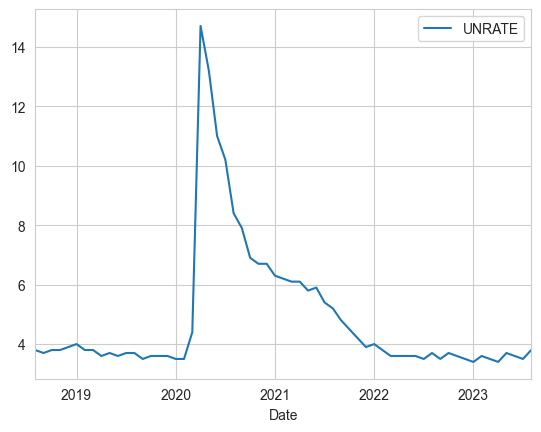

In [142]:
## Unemployment_Rate (실업률)

Unemployment_Rate = fdr.DataReader('FRED:UNRATE', start)
Unemployment_Rate.index.name = 'Date'
print(Unemployment_Rate)
graph = Unemployment_Rate.plot()

In [143]:
## GDP 데이터 불러오기 분기별로밖에 지원안됌

GDP = pd.DataFrame(fred.get_series('GDP',observation_start=start),columns=['GDP'])
GDP.index.name = 'Date'
print(GDP)

                  GDP
Date                 
2018-07-01  20687.278
2018-10-01  20819.269
2019-01-01  21013.085
2019-04-01  21272.448
2019-07-01  21531.839
2019-10-01  21706.532
2020-01-01  21538.032
2020-04-01  19636.731
2020-07-01  21362.428
2020-10-01  21704.706
2021-01-01  22313.850
2021-04-01  23046.934
2021-07-01  23550.420
2021-10-01  24349.121
2022-01-01  24740.480
2022-04-01  25248.476
2022-07-01  25723.941
2022-10-01  26137.992
2023-01-01  26529.774
2023-04-01  26798.605


In [144]:
df.index.name = 'Date'
USD_KRX.index.name = 'Date'
DGS.index.name = 'Date'
T10Y2Y.index.name = 'Date'
VIX.index.name = 'Date'
STLFSI3.index.name = 'Date'
CPI.index.name = 'Date'
Unemployment_Rate.index.name = 'Date'
GDP.index.name = 'Date'


In [145]:
# 'Date' 인덱스를 datetime 형식으로 변환
adj_close_df.index = pd.to_datetime(adj_close_df.index)
USD_KRX.index = pd.to_datetime(USD_KRX.index)
DGS.index = pd.to_datetime(DGS.index)
T10Y2Y.index = pd.to_datetime(T10Y2Y.index)
VIX.index = pd.to_datetime(VIX.index)
STLFSI3.index = pd.to_datetime(STLFSI3.index)
CPI.index = pd.to_datetime(CPI.index)
Unemployment_Rate.index = pd.to_datetime(Unemployment_Rate.index)
GDP.index = pd.to_datetime(GDP.index)


In [149]:

# 모든 결합된 데이터를 합침
econ_df = adj_close_df.join([USD_KRX, DGS, T10Y2Y, VIX], how='left')
print(econ_df)


             Adj Close       Volume  USD_KRX_close  5-year  10-year  20-year  \
Date                                                                           
2018-08-30   20.209999  108250500.0    1108.449951    2.75     2.86     2.93   
2018-08-31   20.110666   80626500.0    1115.449951    2.74     2.86     2.95   
2018-09-04   19.263332  125257500.0    1113.500000    2.78     2.90     2.99   
2018-09-05   18.716000  115812000.0    1121.300049    2.77     2.90     3.00   
2018-09-06   18.730000  112212000.0    1118.099976    2.76     2.88     2.98   
...                ...          ...            ...     ...      ...      ...   
2023-09-11  273.579987  174667900.0    1335.319946    4.40     4.29     4.56   
2023-09-12  267.480011  135999900.0    1320.439941    4.41     4.27     4.54   
2023-09-13  271.299988  111673700.0    1324.099976    4.39     4.25     4.52   
2023-09-14  276.040009  107709800.0    1329.770020    4.42     4.29     4.57   
2023-09-15  274.390015  133422800.0    1

In [ ]:
econ_df.to_csv('econ_df.csv')